## Statistics for Astronomical Applications (Lab 2)
By Jack Schapira

### Abstract

In this notebook, we experiment with the key probability ideas and distributions that represent discrete data. We will be using a coin toss as the example, where there are only two possible outcomes, but the same techniques can be applied to astronomical data- that follows similar distributions.

Flipping a coin can have two outcomes- heads or tails. We will consider this as either success (1) or fail (0). In the first part of this experiment we will define a function that can calculate the probability of receiving a specific number of successful outcomes (heads) out of a specified number of coins thrown at once. We will see that the number of trials of this will largely impact the precision of the probability, hence why we use code to investigate this (as it would be impractical to throw so many coins). We will then compare this randomly generated distribution with an analytical binomial distibution, when the probability of such successes is indeed 0.5 (for large number of trials).

However, in practice we will not always meet an experiment with a success probability of 0.5. Therefore we then create similar functions that can allow the user to define the probability of success. We will then compare those results with that of a binomial, and now also a poisson. From this, we can confirm that the poisson is a good approximation to the binomial distribution in the limit of small probability. Furthermore, a plot of this data will show the user visually which distribution best fits the coin flip situation.

### Introduction

Probabilities and statistics play a vital role in astronomical data analysis. When photons are received on a CCD from space, distributions similar to that of a gaussian function can be observed for celestial objects such as stars. This type of data can be related to gaussian distributions in statistics. Another example is the statistical success in determining the cosmological background fluctutations in observations.

Frequentist statistical theory is based on probabilities. A probability of an event is the limit of its frequency in a certain number of trials. It is also defined as the liklihood of an event occuring. An event is considered random (it is not affected by any external source) and is a part of the sample space (the total set of all events possible). As one increases the number of trials, the relative frequency converges to the exact probability.

The example of a coin flip is classified in statistics as a bernoulli trial. This is defined by a sequence of $n$ identical trials, in which each trial results in one of two possibilities- success or failure. Of course, for a fair coin the probability of a success (heads) would be 50%. However, throughout this experiment we explore what happens when one increases the number of coins thrown at once, what happens when the number of trials is changed, and what happens if the probability of success is not in fact 50%.

### Theory

Let's begin with the definition of a probability.

$$ P(x) = \frac{n_x}{n_T} $$

Where $P(x)$ is the probability of event x occuring, $n_x$ is the number of times event $x$ occurs, and $n_T$ is the total number of possible outcomes. For a coin toss, it can be seen that there are two possible outcomes $(n_T = 2)$ and if we consider a success as the heads outcome $(n_x = 1)$ then we can see that the probability of flipping heads is $P(x) = 0.5$.

However we can take this a step further to make $P$ a function both of $x$ and the number of coins thrown at once, $N$. This can be represented as $P(N,x)$. In the first part of the experiment we use a random number generator function, provided by numpy, to provide random integers- either 0 or 1. The function then calculates the probability of getting $x$ successful outcomes in $N$ coins tossed in $M$ trials.

We will see the similarities between this random function and a more accurate distribution- the Binomial:

$$P(N,x) = \frac{N!}{x!(N-x)!}p^x(1-p)^{N-x}$$

Where $P(N,x)$ is the observed probability of $x$ successful outcomes in $N$ coins thrown at once, and $p$ is the probability of success in one coin $(p=0.5)$. A plot of this function $P(N,x)$ against $x$ will be of significance to compare with the randomly generated distribution.

In the limit of a small probability, however, we can make an approximation to the binomial formula. We shall start be defining a new variable as $\lambda = Np$. Where $N$ is still the number of coins thrown at once, and $p$ is the probability of success. This can be solved for $p$ to get $ p = \frac{\lambda}{N} $.
Substituting $p$ in the original binomial formula gives:

$$P(N,x) = \frac{N!}{x!(N-x)!}(\frac{\lambda}{N})^x(1-\frac{\lambda}{N})^{N-x}$$

Now we can see that in the limit of small $p$, $N$ increases (to infinity). So we can redefine this equation as:

$$\lim_{N\to\infty}P(N,x) = \lim_{N\to\infty}\frac{N!}{x!(N-x)!}(\frac{\lambda}{N})^x(1-\frac{\lambda}{N})^{N-x}$$

Pulling out the constants and splitting the right hand term:

$$\lim_{N\to\infty}P(N,x) = (\frac{\lambda^x}{x!})\lim_{N\to\infty}\frac{N!}{(N-x)!}(\frac{1}{N^x})(1-\frac{\lambda}{N})^{N}(1-\frac{\lambda}{N})^{-x}$$

We can handle this now in steps. First taking the limit of the first term and expanding the factorial:

$\lim_{N\to\infty}\frac{N!}{(N-x)!}(\frac{1}{N^x}) = \lim_{N\to\infty}\frac{N(N-1)(N-2)...(N-x)(N-x-1)...(1)}{(N-x)(N-x-1)...(1)}\frac{1}{N^x} = \lim_{N\to\infty}\frac{N(N-1)(N-2)...(N-x+1)}{N^x} = \lim_{N\to\infty}\frac{N}{N}\frac{N-1}{N}\frac{N-2}{N}...\frac{N-x+1}{N} = 1$

Here we see that all the terms with an $x$ approach 1 as $N$ approaches infinity. Hence this whole term simplifies to $1$.

The second term can be simplified using the definition of the exponential:

$ e = \lim_{x\to\infty}(1+ \frac{1}{x})^x $.

By defining $ k = -\frac{N}{\lambda} $ and substituting this into the second term expression we find that the second is equal to the exponential:

$\lim_{N\to\infty}(1-\frac{\lambda}{N})^{N} = \lim_{N\to\infty}(1+\frac{1}{k})^{k(-\lambda)} = e^{-\lambda}$

Then with the third and final term in the expression we see that as N approaches infinity, the expression becomes:

$\lim_{N\to\infty}(1-\frac{\lambda}{N})^{-x} = 1^{-x} = 1$.

Combining all of this:

$$\lim_{N\to\infty}P(N,x) = (\frac{\lambda^x}{x!})\lim_{N\to\infty}\frac{N!}{(N-x)!}(\frac{1}{N^x})(1-\frac{\lambda}{N})^{N}(1-\frac{\lambda}{N})^{-x} =  \frac{\lambda^x}{x!}e^{-\lambda}$$

Which simplifies to the Poisson equation:

$$ P(N,x) = \frac{\lambda^xe^{-\lambda}}{x!} $$

These are the main equations that will be used throughout the notebook. There are two more definitions that will however be of use: the expectation value, and the variance. The expectation value is defined as:

$$ E(x) = \sum\limits^{N}\limits_{x=0}xP(x) $$

Where $E(x)$ is the expectation value, $N$ is (again) the number of throws in one trial and similarly $x$ is the number of successes in one trial.

The variance is defined and derived as follows. In the derivation below we have made use of the fact that $ E(x) = \sum\limits_{x}xP(x) $ and that the definition of probability is $ \sum\limits_x P(N,x) = 1 $.

$ var(x) = \sum\limits_x (x-E(x))^2 P(N,x) $

$ var(x) = \sum\limits_x (x^2 - 2xE(x)+(E(x))^2 P(N,x) $

$ var(x) = \sum\limits_x x^2P(N,x) - 2E(x)\sum\limits_x x P(N,x) + (E(x))^2 \sum\limits_x P(N,x) $

$ var(x) = \sum\limits_x x^2P(N,x) - 2E(x)\sum\limits_x x P(N,x) + (E(x))^2 $

$ var(x) = \sum\limits_x x^2P(N,x) - 2(E(x))^2 + (E(x))^2 $

$ var(x) = \sum\limits_x x^2P(N,x) - (E(x))^2 $

$$ var(x) = E(x^2) - (E(x))^2 $$

### Experiment and Method

Start by importing some functions from numpy and matplot.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

Now we define a function that takes two user inputs, N = the number of coins tossed in one trial, and x = number of successes (heads) in one trial. By defult, the number of trials has been set to M = 10000. Such a large number provides a more precise result. Experimenting with different values of M proves this, as by continuely running the cell will allow the user to see the probability value change with a smaller range for larger values of M. The answer output has been set to a number of coins in one trial as 20 and the reqeusted number of successes as 10.

In [4]:
def prob(N,x): 
    counts = np.zeros(N+1) # creates array of zeros where each element represents total number of heads thrown out of N in one trial
    M = 10000
    for i in range(0,M):
        draw = np.random.randint(2, size=N) # creates an N element random array of 0's and 1's 
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1 # if success, this adds 1 to the element
    return counts[x]/M

ans = prob(20,10)
print ("Probability is",ans)

Probability is 0.1709


We can then plot the probability values for a range of values of x (successes) between 0 and 20, where the number of coins tosses in one trial, N is 20.

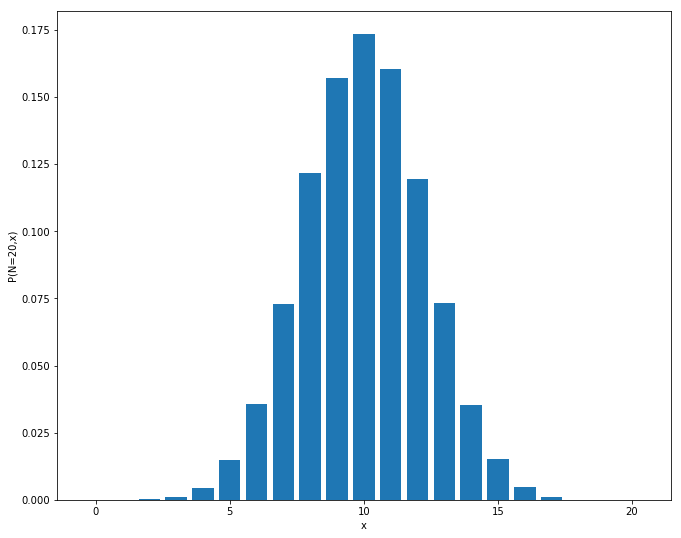

In [5]:
arr = np.array([prob(20,x) for x in range(21)])
plt.bar(np.arange(21), arr)
plt.xlabel('x')
plt.ylabel('P(N=20,x)')
plt.show()

The plot does evidently show a resemblance to a binomial distribution, with a peak at (as expected) 10 successes in 20 coins. We can prove the similarity to the binomial. Below a binomial function is defined, using the equation in the theory section. This distribution is then plotted over the distribution given above to compare how similar the results are.

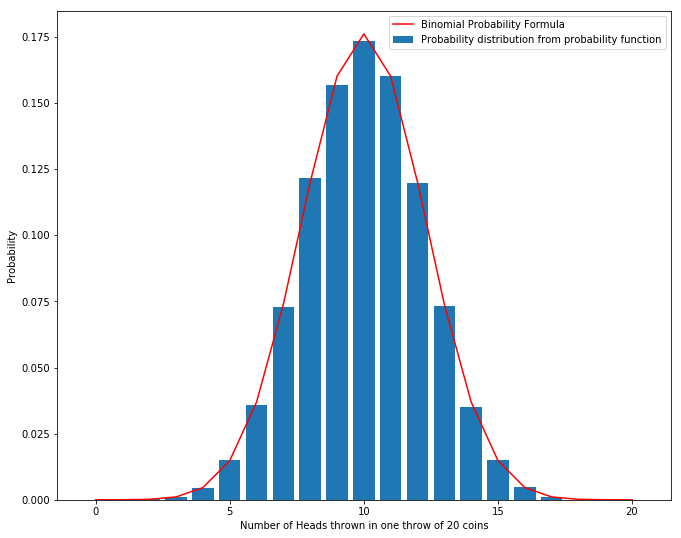

In [6]:
from scipy.misc import factorial 
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((p**x)*(1-p)**(N-x))
    return PNx

plt.bar(np.arange(21), arr, label='Probability distribution from probability function')
plt.plot(np.arange(21), PNx(20), 'r-', label='Binomial Probability Formula')
plt.xlabel("Number of Heads thrown in one throw of %s coins" %(20))
plt.ylabel("Probability")
plt.legend()
plt.show()

We can see that the binomial very closely relates to the discrete distribution based on the random, fair function. Hence, for a probability of success of 0.5 binomial is a good representation for data.

Now we can evaluate the first function by calculating the expectation value for a user specified N. Below N is given to be 20 and 40. After this, the same expectation values of the binomial function is calculated to compare.

In [7]:
exp_20 = np.sum([prob(20,x)*x for x in range(21)])
print ("The Expectation value of x for 20 trials is", exp_20)
exp_40 = np.sum([prob(40,x)*x for x in range(41)])
print ("The Expectation value of x for 20 trials is", exp_40)

The Expectation value of x for 20 trials is 9.816
The Expectation value of x for 20 trials is 19.9776


In [8]:
exp_20_bin = np.sum([(PNx(20)[x])*x for x in range(21)])
print ("The exact Expectation value of x for 20 trials using the Binomial function is", exp_20_bin)
exp_40_bin = np.sum([(PNx(40)[x])*x for x in range(41)])
print ("The exact Expectation value of x for 20 trials using the Binomial function is", exp_40_bin)

The exact Expectation value of x for 20 trials using the Binomial function is 10.0
The exact Expectation value of x for 20 trials using the Binomial function is 20.0


Again, we see that whilst the binomial shows the exact value, the random function is very close in value.

Now we go on to define a new function where the probability of success is not given to be 0.5. In this function the user can define the probability. The aim of this new function is to show how good of an approximation the Poisson function is when the probability of success is very small. To do so we call on the numpy function random.uniform. This creates an array (of size N) of random numbers between 0 and 1. Whenever an element has a value greater than the user defined probability, this would be output as a success (heads count) and vice versa for when less than the probability. Again, writing this into a for loop with M number of trials will change the precision of the output probability.
After defining this function, another plot is made to show what the distribution looks like for success (heads) when 100 coins are thrown in one trial, but when the probability of success is now only 0.01.

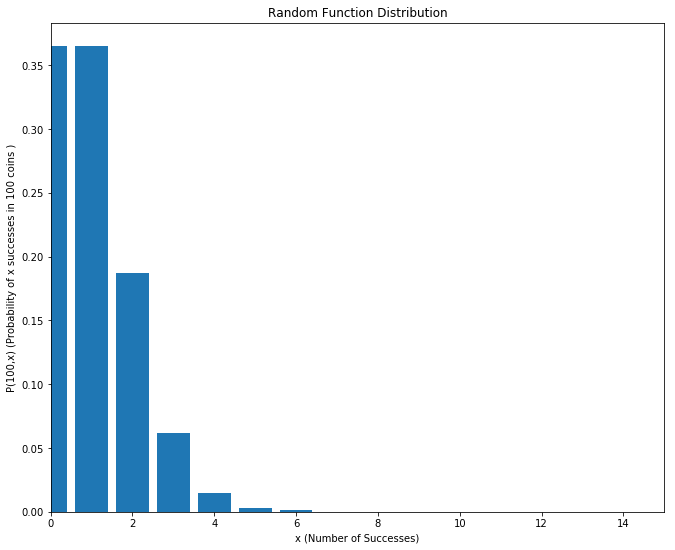

In [12]:
def prob2(N,x): 
    counts = np.zeros(N+1) 
    M = 10000 
    p = 0.01
    for i in range(0,M):
        draw = np.random.uniform(0, 1, size=N)
        heads_count = len(draw[(np.where(draw < p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1 
    return counts[x]/M

arr2 = np.array([prob2(100,x) for x in range(101)])
plt.bar(np.arange(101), arr2)
plt.xlim(0,15)
plt.xlabel('x (Number of Successes)')
plt.ylabel('P(100,x) (Probability of x successes in 100 coins )')
plt.title('Random Function Distribution')
plt.show()

As expected, the distribution peaks at x=1. This makes sense- if the probability of success of 100 coins is only 1%, the peak probability of success is likely to be 1. Now we go on to redefine the previous binomial function to now allow for probability of 0.01. Using the equation in the theory for the poisson distribution, this can also defined as a new function. Both these distributions will then be plotted to compare with each other, and the actual distribution.

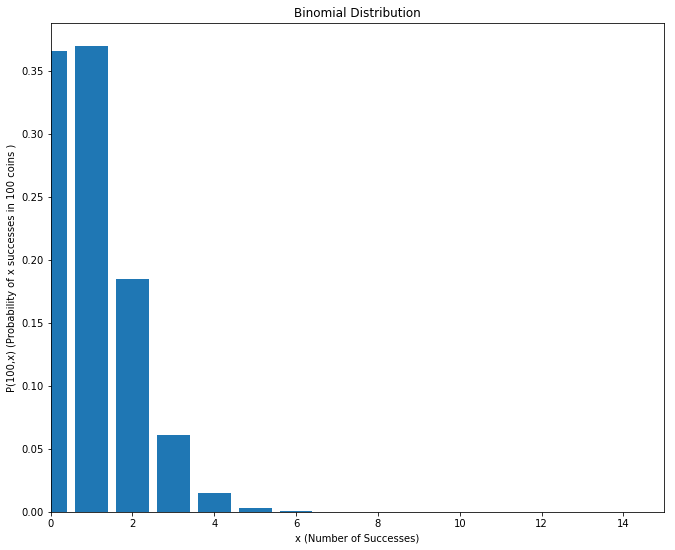

In [13]:
def binom(N,p):
    x = (np.arange(N+1))
    binom = factorial(N)/((factorial(x)*factorial(N-x)))*((p**x)*(1-p)**(N-x))
    return binom

plt.bar(np.arange(101), binom(100,0.01))
plt.xlim(0, 15)
plt.xlabel('x (Number of Successes)')
plt.ylabel('P(100,x) (Probability of x successes in 100 coins )')
plt.title('Binomial Distribution')
plt.show()

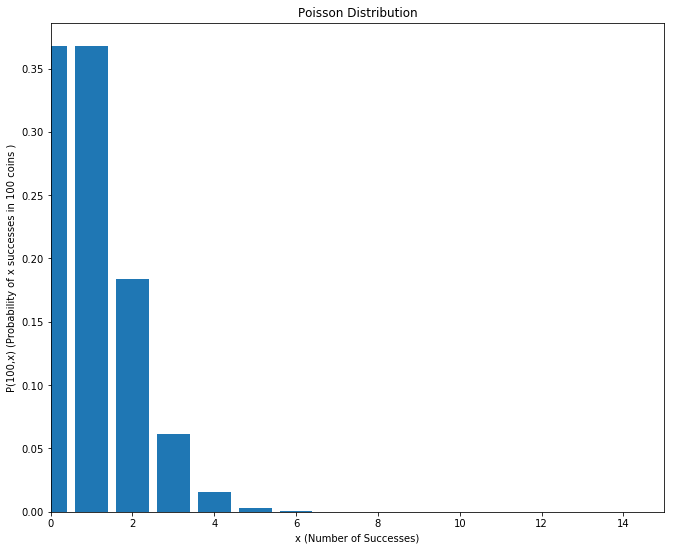

In [14]:
def poiss(N,p):
    x = (np.arange(N+1))
    poiss = ((N*p)**x)*np.exp(-N*p)/factorial(x)
    return poiss

plt.bar(np.arange(101), poiss(100,0.01))
plt.xlim(0,15)
plt.xlabel('x (Number of Successes)')
plt.ylabel('P(100,x) (Probability of x successes in 100 coins )')
plt.title('Poisson Distribution')
plt.show()

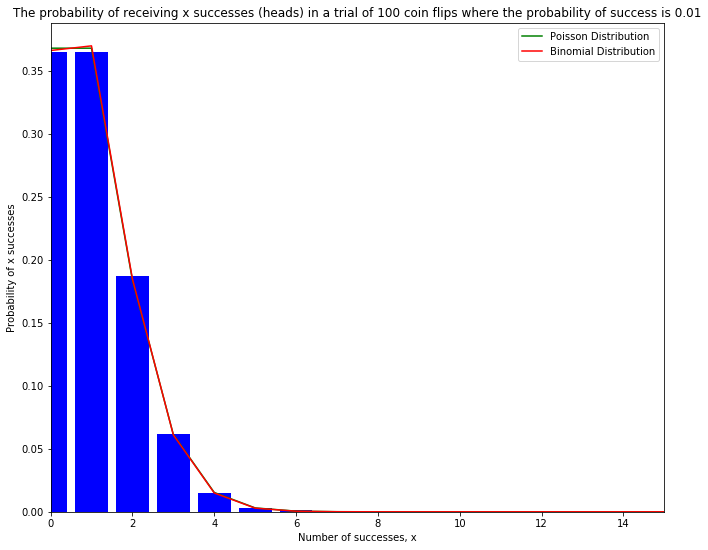

In [15]:
plt.bar(np.arange(101), arr2, color='b')
plt.plot(np.arange(101), poiss(100,0.01), color = 'g', label = 'Poisson Distribution')
plt.plot(np.arange(101), binom(100,0.01), color = 'r', label = 'Binomial Distribution')
plt.xlim(0,15)
plt.xlabel('Number of successes, x')
plt.ylabel('Probability of x successes')
plt.title('The probability of receiving x successes (heads) in a trial of 100 coin flips where the probability of success is 0.01')
plt.legend()
plt.show()

Evident from these graphs, the poisson is indeed a good approximation of the binomial in the limit of small probability- the lines are very close in value and cannot be easily differentiated.

We go on to calculate the expectation and variance values for the poisson distribution for when the number of coins thrown (N) is 20 and the probility of each success is now only 0.01.

In [16]:
exp_20_poiss = np.sum([(poiss(20,0.01)[x])*x for x in range(21)])
print (exp_20_poiss)

exp_20_poiss_squared = np.sum([(poiss(20,0.01)[x])*x**2 for x in range(21)])

var_20_poiss = exp_20_poiss_squared - exp_20_poiss**2
print (var_20_poiss)

0.2
0.2


### Summary

The experiment began by generating a function that took two inputs- the number of coin tosses in one trial and the number of wanted successes defined by the user. The function returned the probability of this happening. We found that changing the number of trials largely impacted the precision of the results. Upon plotting the porbability against x successes, we found that the distribution created closely resembled the binomial distribution, so we then defined this function and plotted it over to compare. We could also compare by looking at the results of the expectation values. It was found that the expectation values were too very close to the true expectation value, given by the binomial distribution.

Then we changed these functions so that the user could change the probability of success that was previously given to be 0.5. Plotting this distribution showed that for small values of p, the poisson distribution very closely related to the binomial distribution. This was also confirmed in the calculation of the variance and expectation values in the poisson distribution- these values were equal.

### Conclusion

It was found in this script that the probability of x successes in N throws does agree with the binomial distribution when probability of success is large. It was found that the number of repeated trials largely impacts this result, as having fewer trials results in a larger range in resulting probabilities (less precise). The expectation values calculated from the random distribution also agreed, backing up that the binomial is a good fit. 
In small values of probability of success it was found that the poisson distribution was just as good a fit as the binomial. The implications of this have a large effect in astrophysics. Clearly coin flipping is of not much interest to astrophysicists. But the distributions that the data above represent are of significance. For example, even for long exposures, the CCD's on ground based telescopes can only collect a very small percentage of photons. As a result, it would make sense to use the poisson distribution to fit this data.

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8]
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8]


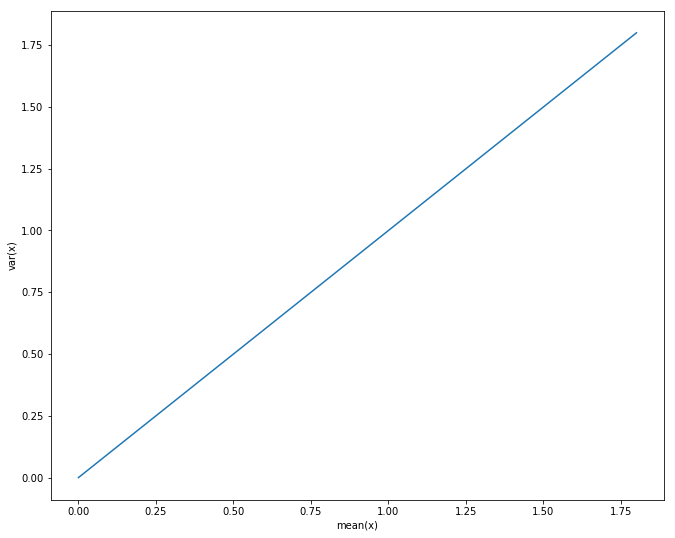

In [20]:
arr = []
arr2 = []
for p in np.arange(0,0.1,0.01):
    exp_20_poiss = np.sum([(poiss(20,p)[x])*x for x in range(21)])
    exp_20_poiss_squared = np.sum([(poiss(20,p)[x])*x**2 for x in range(21)])
    arr.append(exp_20_poiss)
    var_20_poiss = exp_20_poiss_squared - exp_20_poiss**2
    arr2.append(var_20_poiss)
mean_x = np.array(arr)
print (mean_x)
var_x = np.array(arr2)
print (var_x)

plt.plot(mean_x,var_x)
plt.xlabel('mean(x)')
plt.ylabel('var(x)')
plt.show()